# Implementacja filtrowania: funkcja lfilter
## Dla przypomnienia: 
### Działanie filtra w dziedzinie czasu
Najczęściej, wyjście filtra jest kombinacją liniową:

$ y[n] = \sum_{i=1}^{n_b}b(i)x[n-i] - \sum_{i=2}^{n_a}a(i)y[n-i]$

gdzie: 

* $n_b$ liczba przeszłych próbek wejściowych $x$
* $n_a$ liczba przeszłych próbek wyjściowych $y$

użytych do obliczenia aktualnego wyjścia $y[n]$.
 
Większa z liczb  $n_b$ i $n_a$ określa "rząd" filtra.

Zauważmy, że matematycznie operacje te odpowiadają splataniiu próbek wejściowych z wektorem $b$ i próbek wyjściowych z wektorem $a$.
Filtrowanie zgodne z powyższymi równaniami zaimplementowane jest w pythonie w module scipy.signal jako funkcja lfilter.

Podstawowe wywołanie tej funkcji dla sygnału we wygląda następująco: 

``wy = scipy.signal.lfilter(b,a,we)`` 

gdzie b, a są to współczynniki z poprzedniego równania. np:

In [ ]:
import numpy as np
import pylab as py
from  scipy.signal import lfilter

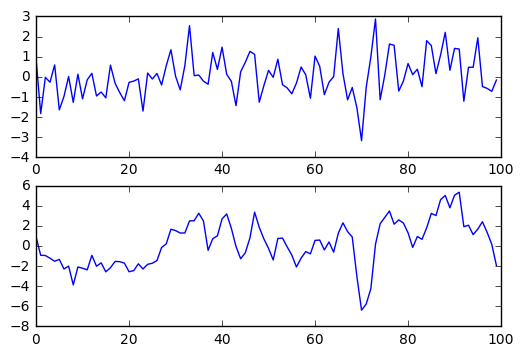

In [1]:
b = np.array([1,  1, 1, 1]) # licznik
a = np.array([1.0]) # mianownik
we = np.random.randn(100)
wy=lfilter(b,a,we);
py.subplot(2,1,1)
py.plot(we)
py.subplot(2,1,2)
py.plot(wy)
py.show()

Widać, że powyższy filtr uśrednia 4 ostatnie próbki wejściowe. Jest to filtr dolnoprzepustowy.  

# Specyfikacja własności filtru
### Filtr specyfikujemy opisując moduł jego pożądanej funkcji przenoszenia: 
Ogólne określenie granic pasma przenoszenia np: "dla sygnału próbkowanego 128 Hz zaprojektować filtr dolnoprzepustowy 30 Hz", oznacza, że w idealnej sytuacji filtr będzie przenosił bez zmian częstości od 0 do 30 Hz a od 30Hz do 64Hz będzie całkowicie tłumił. W bardziej rygorystycznym opisie możemy dodatkowo podać:
* dopuszczalną amplitudę oscylacji Rp w paśmie przenoszenia (pass band), 
* minimalne tłumienie Rs pasma tłumienia (stop band), 
* szerokość pasma przejściowego 


# Funkcje do projektowania filtrów FIR
W module <tt>scipy.signal</tt> mamy kilka funkcji do projektowania filtrów typu FIR. 
### firwin
Najprostszą koncepcyjnie metodą projektowania filtrów FIR jest metoda okienkowa.  
Metoda składa się z następujących kroków: w dziedzinie częstości projektowana jest idealna funkcja przenoszenia, obliczana jest od niej odwrotna transformata Fouriera, następnie otrzymana sekwencja czasowa (odpowiedź impulsowa) jest przemnażana przez wybrane okno.

Metoda ta zaimplementowana jest w funkcji 
<tt>scipy.signal.firwin(numtaps, cutoff, width=None, window='hamming', pass_zero=True, scale=True, nyq=1.0)</tt>.

Pozwala ona projektować filtry dolno- i górno- przepustowe oraz pasmowo przepustowe i pasmowo zaporowe metodą okienkową.

Najważniejsze parametry (kompletny opis w dokumentacji)

http://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html#scipy.signal.firwin


*  <tt>numtaps</tt>: int, ilość współczynników filtru (rząd filtru+1). Liczba ta musi być parzysta jeśli pasmo przenoszenia ma zawierać częstość Nyquista.


* <tt>cutoff</tt>: częstość odcięcia filtru. Może być jedną liczbą zmiennoprzecinkową dla filtru dolno- lub górno- przepustowego lub tablicą dla filtrów pasmowych. Wyrażamy ją w tych samych  jednostkach co <tt>nyq</tt> i musi zawierać się pomiędzy 0 a <tt>nyq</tt>. 


* <tt>window</tt>: napis lub krotka: określa jakiego okna użyć do projektu filtru. Może to być dowolne okno spośród opisanych w <tt>scipy.signal.get_window</tt> 


* <tt>pass_zero</tt>: bool, Jeśli True to zero jest przenoszone, jeśli False to nie jest. Ten parametr decyduje jak jest interpretowane pierwsze pasmo od 0 do <tt>cutoff</tt> - czy ma to być pasmo przenoszone czy tłumione.


* <tt>nyq</tt>: float. Częstość Nyquista.


* Zwraca: współczynniki <tt>b</tt>



### firwin2

Funkcja 

``scipy.signal.firwin2(numtaps, freq, gain, nfreqs=None, window='hamming', nyq=1.0)``

również implementuje okienkową metodę projektowania filtrów FIR. Daje ona nieco większą swobodę w kształtowaniu idealnej funkcji przenoszenia. Zadaje się ją przez podanie dwóch wektorów: ``freq`` i ``gain``. Wektor freq definiuje punkty w częstości (jednostki takie same jak ``nyq``, muszą zawierać 0 i ``nyq``) dla których znana jest wartość pożądanego przenoszenia. Pożądane wartości przenoszenia odpowiadające kolejnym częstościom definiowane są w ``gain``. Wartości ``freq`` muszą być ułożone w kolejności rosnącej, dopuszczalne jest powtórzenie tej samej wartości częstości i odpowiadających im różnych wartości gain aby zdefiniować nieciągłość funkcji przenoszenia. Znaczenie pozostałych parametrów jest takie samo jak dla ``firwin.
Przykład: filtr górno przepustowy. Liniowo narastające przenoszenie pomiędzy 20 a 40 Hz:

### Przykładowe projekty
We wszystkich poniższych przykładach zakładamy, że częstość próbkowania wynosi 256Hz:
*  filtr dolnoprzepustowy rzędu 20 z częstością odcięcia 40Hz:

<tt>firwin(21, 40/128.0, nyq= 1)</tt>

<tt>firwin(21, 40, nyq= 128)</tt>

*  filtr górnoprzepustowy rzędu 15 z częstością odcięcia 5 Hz: 

<tt>firwin(16, 5, nyq= 128, pass_zero=False)</tt>

*  pasmowo przepustowy 5 rzędu przenoszący częstości pomiędzy 8 a 14 Hz: 

<tt>firwin(6, [8 14], nyq= 128, pass_zero=False)</tt>

*  pasmowo zaporowy 5 rzędu tłumiący częstości pomiędzy 8 a 14 Hz: 

<tt>firwin(6, [8 14], nyq= 128, pass_zero=True)</tt>

Demo własności "audio" filtrów tego typu: [http://www.falstad.com/dfilter/applet ]

In [12]:
import numpy as np
import pylab as py
from  scipy.signal import firwin2,lfilter
f = np.array([0, 20, 40, 128])
g = np.array([0, 0,  1.,  0])
b = firwin2(50,f,g, nyq=128)# licznik
print b

[ -2.72607880e-05  -1.20239479e-04  -1.71394904e-04  -6.14430988e-05
   2.71151183e-04   6.82792621e-04   8.04292859e-04   3.14406923e-04
  -6.36922627e-04  -1.32847691e-03  -1.04243609e-03   1.23150368e-05
   4.16734184e-04  -1.31475839e-03  -4.65917763e-03  -5.99445601e-03
  -4.41670696e-04   1.34496620e-02   2.91853504e-02   3.23061409e-02
   7.12534841e-03  -5.20509520e-02  -1.30420957e-01  -1.77437782e-01
   2.91094648e-01   2.91094648e-01  -1.77437782e-01  -1.30420957e-01
  -5.20509520e-02   7.12534841e-03   3.23061409e-02   2.91853504e-02
   1.34496620e-02  -4.41670696e-04  -5.99445601e-03  -4.65917763e-03
  -1.31475839e-03   4.16734184e-04   1.23150368e-05  -1.04243609e-03
  -1.32847691e-03  -6.36922627e-04   3.14406923e-04   8.04292859e-04
   6.82792621e-04   2.71151183e-04  -6.14430988e-05  -1.71394904e-04
  -1.20239479e-04  -2.72607880e-05]


# Badanie własności filtru w dziedzinie częstości
Podstawowe własności filtru możemy łatwo odczytać z wykresu przedstawiającego moduł funkcji przenoszenia i jej fazę w zależności od częstości. Moduł funkcji przenoszenia najczęściej wykreśla się w skali pół logarytmicznej.

W module <tt>scipy.signal</tt> zaimplementowana jest funkcja <tt>freqz</tt>, która wylicza wartości funkcję przenoszenia filtru zadanego współczynnikami <tt>b, a</tt> w zadanej ilości dyskretnych częstości. Poniższy przykład przedstawia własności filtra dolnoprzepustowego rzędu 50 o częstości odcięcia równej połowie częstości Nyquista.

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in true_divide


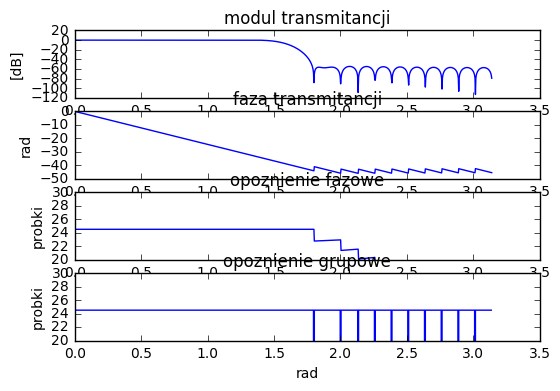

In [4]:
# encoding: utf-8
import numpy as np
import pylab as py
from  scipy.signal import freqz, firwin
 
 
b = firwin(50,0.5)# licznik
a = np.array([1.0]) # mianownik
n = 1000 # n ilość punktów na których będzie obliczona funkcja h
w, h = freqz(b,a,n) 
 
m = np.abs(h) # moduł transmitancji
phi = np.unwrap(np.angle(h)) # faza
py.subplot(4,1,1)
py.plot(w,20*np.log10(m))
py.ylabel('[dB]')
py.title('modul transmitancji')
py.subplot(4,1,2)
py.plot(w,phi)
py.title('faza transmitancji')
py.ylabel('rad')
py.xlabel('rad/probki')
 
fazowe = - phi/w
py.subplot(4,1,3)
py.plot(w,fazowe)
py.ylim([20,30])
py.title('opoznienie fazowe')
py.ylabel('probki')
py.xlabel('rad')
 
 
grupowe = - np.diff(phi)/np.diff(w)
py.subplot(4,1,4)
py.plot(w[:-1],grupowe)
py.ylim([20,30])
py.title('opoznienie grupowe')
py.ylabel('probki')
py.xlabel('rad')
 
py.show()

# W dziedzinie czasu
Porównajmy działanie tego filtra w czasie z funkcjami przesunięć fazowych i grupowych:

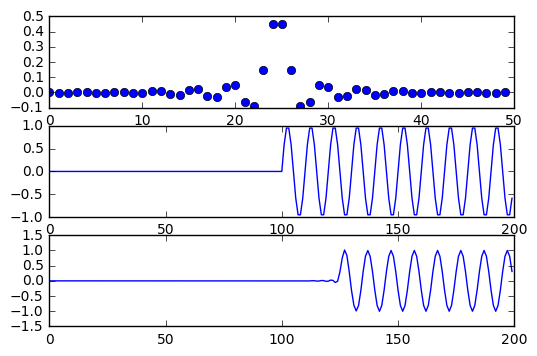

In [6]:
import numpy as np
import pylab as py
from  scipy.signal import lfilter, firwin


b = firwin(50,0.5)# licznik
py.subplot(3,1,1)
py.plot(b,'o')

s1 = np.zeros(100)
t = np.arange(0,1,0.01)
s2 = np.sin(2*np.pi*10*t)
s = np.concatenate((s1,s2))
py.subplot(3,1,2)
py.plot(s)

py.subplot(3,1,3)
y = lfilter(b,1,s)
py.plot(y)

py.show()

Zaprojektuj i zbadaj własności filtru:
FIR dolno z pasmem przenoszenia od 30 Hz dla sygnału próbkowanego 256 Hz
Znajdź rząd filtru FIR:
dolnoprzepustowego z pasmem przenoszenia do 40 Hz dla sygnału próbkowanego 256 Hz, tak aby dla częstości powyżej 45 Hz jego tłumienie było nie mniejsze niż 20dB.


# Filtry IIR
Filtry o nieskończonej odpowiedzi impulsowej (''infinite impulse response'', IIR) mają zazwyczaj dużo niższe rzędy niż filtry o skończonej odpowiedzi impulsowej (''finite impulse response'', FIR) z analogicznym poziomem tłumienia i szerokością pasma przejściowego.

W module <tt>scipy.signal</tt> mamy zaimplementowane kilka funkcji do projektowania &bdquo;optymalnych&rdquo; pod różnymi względami filtrów w klasycznych konfiguracjach:
dolno- albo górnoprzepustowe i pasmowo-przepustowe albo pasmowo-zaporowe.

## Funkcje do projektowania filtrów IIR dostępne w module <tt>scipy.signal</tt>
W module <tt>scipy.signal</tt> dostępne są funkcje do projektowania czterech typów filtrów: Butterwortha, Czebyszewa typu I i II, oraz eliptyczny.
Do opisu wymagań projektowych funkcje te wykorzystują następujące pojęcia:
* <tt>wp</tt>, <tt>ws</tt> &mdash; krawędzie pasma przenoszenia i tłumienia. Częstości są znormalizowane do zakresu od 0 do 1 (1 odpowiada częstości Nyquista) przykładowo:
* * dolno-przepustowy:  <tt>wp = 0.2</tt>,          <tt>ws = 0.3</tt>
* * górno-przepustowy:  <tt>wp = 0.3</tt>,          <tt>ws = 0.2</tt>
* * pasmowo-przepustowy:  <tt>wp = [0.2, 0.5]</tt>,   <tt>ws = [0.1, 0.6]</tt>
* * pasmowo-zaporowy:  <tt>wp = [0.1, 0.6]</tt>,   <tt>ws = [0.2, 0.5]</tt>
* <tt>gpass</tt> &mdash; maksymalna dopuszczalna strata w pasmie przenoszenia (w funkcjach projektujących filtry jest to <tt>rp</tt>) (dB).
* <tt>gstop</tt> &mdash; minimalne wymagane tłumienie w pasmie tłumienia (w funkcjach projektujących filtry jest to <tt>rs</tt>) (dB).
* <tt>btype</tt> &mdash; typ filtra (<tt>'lowpass'</tt>, <tt>'highpass'</tt>, <tt>'bandpass'</tt>, <tt>'bandstop'</tt>).

Funkcje do projektowania filtrów są zaimplementowane parami: jedna pomaga dobierać rząd filtru do wymagań projektowych, a druga oblicza współczynniki filtru. 

Filtr Butterwortha daje gładką (bez tętnień) funkcję przenoszenia w całym zakresie częstości:

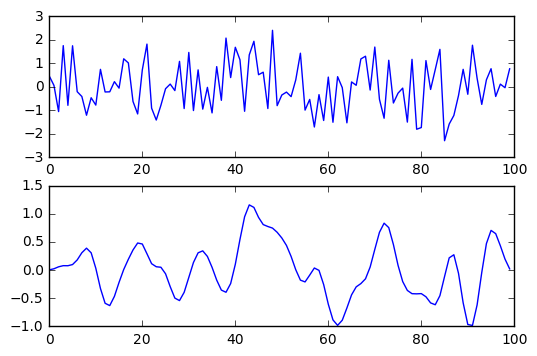

In [40]:
import numpy as np
import pylab as py
from  scipy.signal import *
wp = 0.2
ws = 0.3
gpass,rp = 1,1
gstop,rs = 10,10
we = np.random.randn(100)

[n,Wn]=buttord(wp, ws, gpass, gstop, analog=0)
[b,a]=butter(n,Wn)
wy=lfilter(b,a,we)
py.subplot(2,1,1)
py.plot(we)
py.subplot(2,1,2)
py.plot(wy)
py.show()

### Filtr Czebyszewa I rodzaju 

gładka funkcja przenoszenia w paśmie tłumienia, minimalizowane są tętnienia  w paśmie przenoszenia

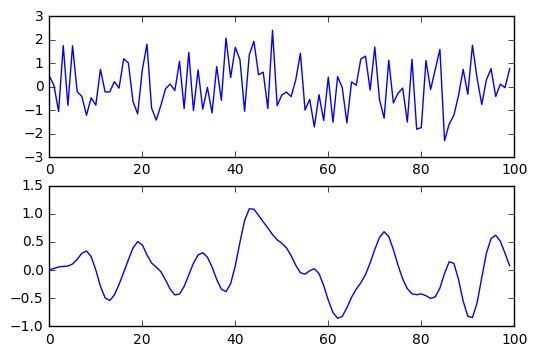

In [41]:
[n,Wn]=cheb1ord(wp, ws, gpass, gstop, analog=0);
[b,a]=cheby1(n, rp, Wn, btype='low', analog=0, output='ba')
wy=lfilter(b,a,we)
py.subplot(2,1,1)
py.plot(we)
py.subplot(2,1,2)
py.plot(wy)
py.show()

### Filtr Czebyszewa II rodzaju

gładka funkcja przenoszenia w paśmie przenoszenia, minimalizowane tętnienia w paśmie tłumienia

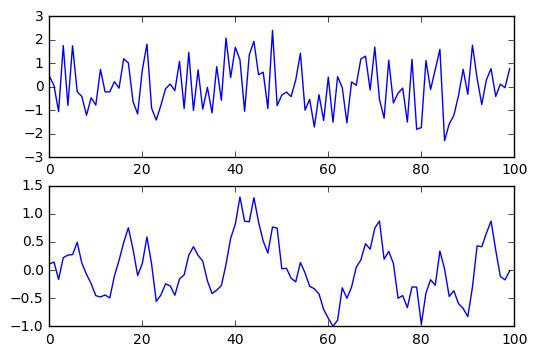

In [42]:
[n,Wn]=cheb2ord(wp, ws, gpass, gstop, analog=0);
[b,a]=cheby2(n, rs, Wn, btype='low', analog=0, output='ba')
wy=lfilter(b,a,we)
py.subplot(2,1,1)
py.plot(we)
py.subplot(2,1,2)
py.plot(wy)
py.show()

### Filtr eliptyczny 
daje najostrzejsze przejście pomiędzy pasmem tłumienia i przenoszenia przy tym samym rzędzie w porównaniu z wyżej wymienionymi filtrami, tętnienia są obecne zarówno w paśmie przenoszenia jak i w paśmie tłumienia


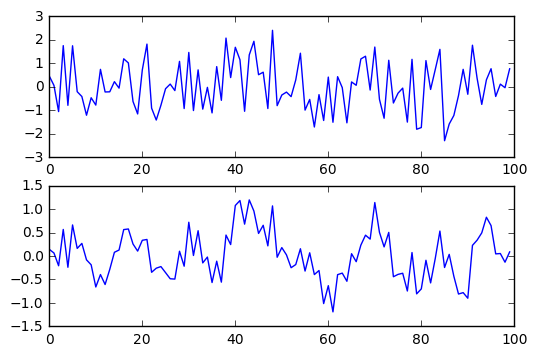

In [44]:
[n,Wn]=ellipord(wp, ws, rp,rs);
[b,a]=ellip(n, rp, rs, Wn, btype='low', analog=0, output='ba')
wy=lfilter(b,a,we)
py.subplot(2,1,1)
py.plot(we)
py.subplot(2,1,2)
py.plot(wy)
py.show()

## Filtrowanie z zerowym przesunięciem fazowym
Filtrowanie sygnałów off-line można zrealizować tak, aby sygnał wyjściowy nie miał przesunięcia fazowego. 
Procedura powyższa zaimplementowana jest w funkcji: scipy.signal.filtfilt. Jej działanie i porównanie z efektami funkcji lfilter przedstawia poniższy przykład:

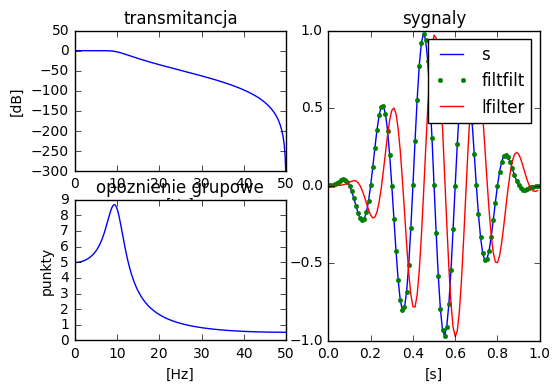

In [4]:
from scipy.signal import filtfilt, butter, freqz, lfilter
import numpy as np
import pylab as py
 
# częstość próbkowania
Fs = 100.0
# projekt dolnoprzepustowego filtra Butterwortha 5 rzędu
# o częstości odcięcia 10 Hz  
[b,a] = butter(5,10.0/(Fs/2.0))
 
# obliczamy funkcję przenoszenia
w,h = freqz(b,a,500)
transmitancja = np.abs(h)
 
#opóźnienie grupowe
grupowe = -np.diff(np.unwrap(np.angle(h)))/np.diff(w)  
 
# przeliczamy skalę częstości na Hz 
f = w/(np.pi)*Fs/2.0
 
# generujemy sygnał
t = np.arange(0,1,1/Fs)
s = np.sin(2*np.pi*5*t)*np.hanning(len(t))
 
# Filtrowanie z zerowym opoznieniem fazowym
y = filtfilt(b,a,s)
 
# Filtrowanie standardowe
y1 = lfilter(b,a,s)
 
# WYKRESY
py.subplot(2,2,1)
py.plot(f,20*np.log10(transmitancja)) # przeliczenie modułu transmitancji na dB
py.title('transmitancja')
py.xlabel('[Hz]')
py.ylabel('[dB]')
 
py.subplot(2,2,3)
py.plot(f[:-1], grupowe )
py.title('opoznienie grupowe')
py.xlabel('[Hz]')
py.ylabel('punkty')
 
py.subplot(1,2,2)
py.plot(t,s)
py.plot(t,y,'g.')
py.plot(t,y1,'r')
py.legend(('s','filtfilt','lfilter'))
py.xlabel('[s]')
py.title('sygnaly')
py.show()


### Zadanie 2

Skonstruować filtry dolnoprzepustowe rzędu n=5, o częstości odcięcia 30 Hz przy częstości próbkowania sygnału 128 Hz, rp = 0,5 dB, rs = 20 dB, przy pomocy wszystkich podanych powyżej funkcji i porównać ich własności.

### Zadanie 3
Dobrać rząd i zaprojektować, a następnie zbadać własności otrzymanego filtru Butterwortha spełniającego poniższe kryteria:
pasmo przenoszenia 1000-2000 Hz, pasmo tłumienia zaczyna się 500 Hz od każdego z brzegów pasma przenoszenia,
próbkowanie 10 kHz, najwyżej 1 dB tętnienia w paśmie przenoszenia, co najmniej 60 dB tłumienia w paśmie tłumienia.

### Zadanie 4
Zaprojektować filtr do wyławiania wrzecion snu z sygnału. Wrzeciona snu to struktury w sygnale EEG rejestrowanym w czasie snu zawierające się w paśmie 11-15 Hz.

## Przepróbkowywanie

### Przepróbkowywanie do góry: 
Zwiększamy częstość prókowania całkowitą ilość razy P

Najpowszechniej stosowana metoda polega na dodaniu P zer pomiędzy istniejące próbki sygnału tak aby osiągnął on P-krotnie większą długość. Następnie taki rozciągnięty sygnał filtrujemy filtrem dolnoprzepustowym o częstości odcięcia nie większej niż częstość Nyquista oryginalnego sygnału — rozciąganie sygnału nie dokłada do niego nowej informacji więc i tak nic nie tracimy.
Przykład przepróbkowania do góry:



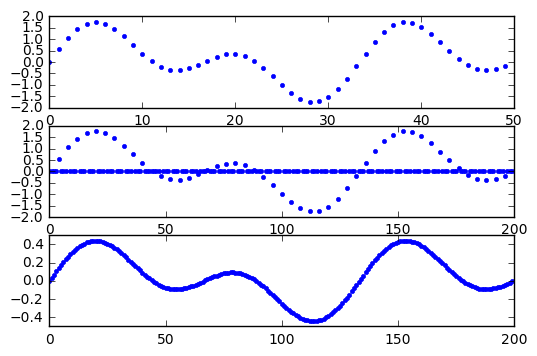

In [1]:
from scipy.signal import filtfilt, butter
import numpy as np
import pylab as py
 
t = np.arange(0,0.05,0.001) # czas
x = np.sin(2*np.pi*30*t) + np.sin(2*np.pi*60*t) # sygnał
 
py.subplot(3,1,1)
py.plot(x,'.')
py.subplot(3,1,2)
X = np.zeros(4*len(x))
X[::4] = x
py.plot(X,'.')
[b,a] = butter(8,1.0/4)
y = filtfilt(b,a,X);
py.subplot(3,1,3)
py.plot(y,'.')
py.show()

### Przepróbkowanie do dołu: 
Zmniejszamy częstość próbkowania całkowitą ilość razy.
Musimy pamiętać o tym, żeby wyfiltrować to, co było w oryginalnym sygnale powyżej docelowego Nyquista, żeby uniknąć aliasingu w wynikowym sygnale.

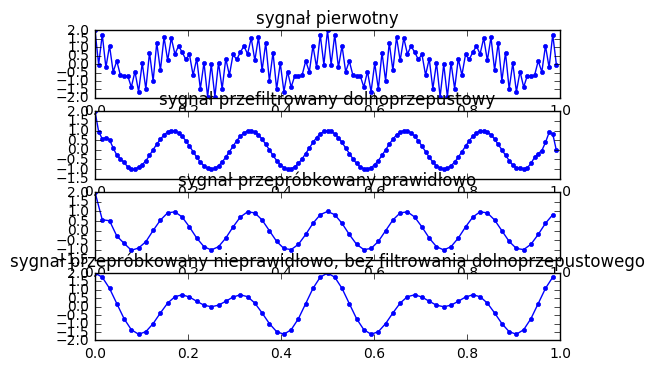

In [11]:
from scipy.signal import filtfilt, butter
from numpy import pi, arange, sin
from pylab import plot, subplot, show, title
 
Fs1 = 128.0 # pierwotna częstość próbkowania [Hz]
FN1 = Fs1/2 # pierwotna częstość Nyquista
 
t = arange(0,1,1.0/Fs1) # czas probkowany 1/Fs1
f1 = 6 # Hz
f2 = 60
fi = pi/2
s = sin(2*pi*t*f1+fi) + sin(2*pi*t*f2+fi)
subplot(4,1,1)
plot(t,s,'.-')
title(u'sygnał pierwotny')
# obnizamy czestosc probkowania k razy
k = 2
Fs2 = Fs1/k # nowa czestosc probkowania jest k razy niższa
FN2 = Fs2/2 # nowa częstość Nyquista
[b,a] = butter(8,FN2/FN1) # przefiltrujemy filtrem dolnoprzepustowym
                          # tak aby nic nie zostało powyzej
                          # docelowej częstości Nyquista 
ss = filtfilt(b,a,s);
t2 = arange(0,1,1.0/Fs2) 
subplot(4,1,2)
plot(t,ss,'.-')
title(u'sygnał przefiltrowany dolnoprzepustowy')
 
subplot(4,1,3)
ss2 = ss[::k]
plot(t2,ss2,'.-')
title(u'sygnał przepróbkowany prawidłowo')
 
subplot(4,1,4)
ss3 = s[::k]
plot(t2,ss3,'.-')
title(u'sygnał przepróbkowany nieprawidłowo, bez filtrowania dolnoprzepustowego')
show()

### Zmiana częstości o wymierną ilość razy:

Zmieniamy częstość próbkowania o wymierną $\frac{P}{Q}$ liczbę razy — uzyskujemy składając powyższe kroki tzn. najpierw zwiększamy częstość P-krotnie, a następnie zmniejszamy Q-krotnie.

### Zadanie 6
Proszę napisać funkcję, która będzie przepróbkowywać sygnał o wymierną liczbę razy. Funkcja powinna przyjmować sygnał, częstość próbkowania, parametry P i Q i zwracać przepróbkowany sygnał i nową częstość próbkowania

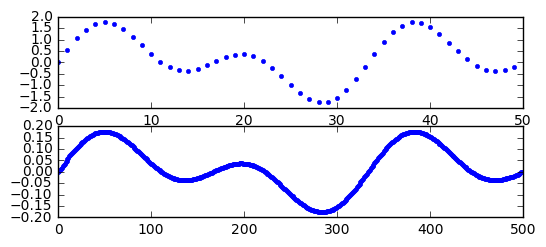

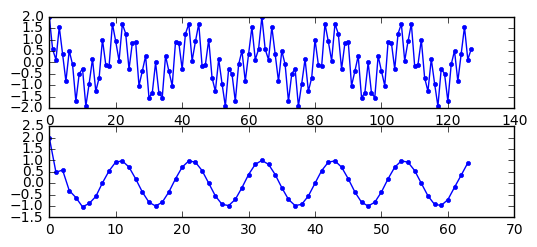

In [3]:
import numpy as np
import pylab as py
from scipy.signal import filtfilt, butter
def resample(s,fs,P=1,Q=1):
    if P>1 and isinstance(P,int):
        sP = np.zeros(P*len(s))
        sP[::P] = s
        fs = fs*P
        [b,a] = butter(8,1.0/P)
        s = filtfilt(b,a,sP)
    if Q>1 and isinstance(Q,int):
        fs = fs/Q 
        [b,a] = butter(8,1./Q) 
        s = filtfilt(b,a,s)
        s = s[::Q]
    return s,fs

fs = 1000
t = np.arange(0,0.05,0.001) # czas
s1 = np.sin(2*np.pi*30*t) + np.sin(2*np.pi*60*t) # sygnał
 
py.subplot(3,1,1)
py.plot(s1,'.')
y,fs2 = resample(s1,fs,P=10,Q=1)
py.subplot(3,1,2)
py.plot(y,'.')
py.show()

fs = 128.0
t = np.arange(0,1,1.0/fs)
f1 = 6 # Hz
f2 = 40
fi = np.pi/2
s2 = np.sin(2*np.pi*t*f1+fi) + np.sin(2*np.pi*t*f2+fi)
py.subplot(3,1,1)
py.plot(s2,'.-')
y,fs2 = resample(s2,fs,P=1,Q=2)
py.subplot(3,1,2)
py.plot(y,'.-')
py.show()